In [41]:
import pandas as pd
import json

In [42]:
# Load your JSON data
with open("../data/europepmc_articles.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Create DataFrame
df = pd.DataFrame(data)

In [43]:
# Convert 'year' to numeric (some entries might have string types)
df['year'] = pd.to_numeric(df['year'])
df

,pubmed_id,doi,title,author_string,orcids,affiliations,year,journal_title,journal_volume,journal_issue,...,abstract,is_open_access,publication_status,publication_model,cited_by_count,mesh_terms,chemicals,grants,full_text_urls,pdb_linked
0,40566752,10.1093/jb/mvaf039,Interaction between a fluoroquinolone derivati...,"Ichijo R, Kawai G.",[],"[Graduate School of Engineering, Chiba Institu...",2025,Journal of biochemistry,None,None,...,To progress the RNA-binding small molecule dru...,False,aheadofprint,Print-Electronic,0,[],[],[],[https://doi.org/10.1093/jb/mvaf039],True
1,40537411,10.1002/anie.202510889,Is a Malleable Active Site Loop the Key to Hig...,"Kudalkar GP, Leidner F, Kumar N, Hass JL, Madz...",[0000-0001-7550-0112],"[X-Ray Crystallography Facility, University of...",2025,Angewandte Chemie (International ed. in English),None,None,...,These studies reveal the first structure of Cl...,False,aheadofprint,Print-Electronic,0,[],[],"[NSF, NIH HHS, U.S. Department of Energy, Offi...",[https://doi.org/10.1002/anie.202510889],True
2,40512786,10.1073/pnas.2421325122,Structural basis of the hepatitis B virus X pr...,"Tanaka H, Diogo Dias J, Jay B, Kita S, Sasaki ...","[0000-0002-7404-3527, 0009-0007-8979-6779, 000...","[Department of Structural Virology, National I...",2025,Proceedings of the National Academy of Science...,122,24,...,A cure for chronic hepatitis B requires elimin...,False,ppublish,Print-Electronic,0,"[Humans, Hepatitis B virus, DNA-Binding Protei...","[hepatitis B virus X protein, DDB1 protein, hu...",[Japan Agency for Medical Research and Develop...,[https://doi.org/10.1073/pnas.2421325122],True
3,40626860,10.7554/elife.104064,Function and firing of the &lt;i&gt;Streptomyc...,"Casu B, Sallmen JW, Haas PE, Chandra G, Afanas...","[0000-0003-3508-6804, 0000-0002-7882-6676, 000...","[John Innes Centre, Department of Molecular Mi...",2025,eLife,14,None,...,Bacterial contractile injection systems (CIS) ...,True,epublish,Electronic,1,"[Cell Membrane, Streptomyces coelicolor, Bacte...","[Membrane Proteins, Bacterial Proteins]",[Biotechnology and Biological Sciences Researc...,"[https://doi.org/10.7554/eLife.104064, https:/...",True
4,40495786,10.1021/acs.jcim.5c00397,Integrating Hydrogen Exchange with Molecular D...,"Walters BT, Patapoff AW, Kiefer JR, Wu P, Wang W.",[],[Department of Biochemistry and Cellular Pharm...,2025,Journal of chemical information and modeling,65,12,...,We introduce hydrogen-exchange experimental st...,False,ppublish,Print-Electronic,0,"[Hydrogen, Ligands, Crystallography, X-Ray, De...","[Ligands, Hydrogen, Protein Serine-Threonine K...","[NIGMS NIH HHS, NIGMS NIH HHS]",[https://doi.org/10.1021/acs.jcim.5c00397],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,18446213,10.1371/journal.pone.0002040,Intervening with urinary tract infections usin...,"Wellens A, Garofalo C, Nguyen H, Van Gerven N,...","[0000-0002-4269-3904, 0000-0003-2146-0586, 000...",[Department of Molecular and Cellular Interact...,2008,PloS one,3,4,...,<h4>Background</h4>Escherichia coli strains ad...,True,epublish,Electronic,155,"[Cell Line, Fimbriae, Bacterial, Intracellular...","[chitobiose, fimH protein, E coli, Anti-Bacter...","[NIDDK NIH HHS, NIAID NIH HHS, NIAID NIH HHS, ...","[https://doi.org/10.1371/journal.pone.0002040,...",True
910,19461840,10.1107/s0021889807021206,Phaser crystallographic software.,"McCoy AJ, Grosse-Kunstleve RW, Adams PD, Winn ...","[0009-0001-6855-9631, 0000-0001-9333-8219, 000...","[Daresbury Laboratory, Warrington WA4 4AD,, La...",2007,Journal of applied crystallography,40,Pt 4,...,Phaser is a program for phasing macromolecular...,True,ppublish,Print-Electronic,15532,[],[],[Biotechnology and Biological Sciences Researc...,[http://journals.iucr.org/j/issues/2007/04/00/...,True
911,16855301,10.1107/s0907444906019949,HKL-3000: the integration of data reduction an...,"Minor W, Cymborowski M, Otwinowski Z, Chruszcz M.","[0000-0001-7075-7090, 0000-0003-364

In [44]:
# Group by year
grouped = df.groupby('year').agg(
    total_publications=('pubmed_id', 'count'),
    pdb_linked_count=('pdb_linked', 'sum')
)
grouped

,total_publications,pdb_linked_count
year,,
2004,1,1
2006,2,2
2007,1,1
2008,1,1
2010,2,2
2012,1,1
2014,1,1
2017,1,1
2018,3,3


In [45]:
# Calculate growth rate of PDB-linked publications year-over-year
grouped['pdb_linked_growth (%)'] = grouped['pdb_linked_count'].pct_change().fillna(0).round(2) * 100
grouped = grouped.reset_index()
grouped

,year,total_publications,pdb_linked_count,pdb_linked_growth (%)
0,2004,1,1,0.0
1,2006,2,2,100.0
2,2007,1,1,-50.0
3,2008,1,1,0.0
4,2010,2,2,100.0
5,2012,1,1,-50.0
6,2014,1,1,0.0
7,2017,1,1,0.0
8,2018,3,3,200.0
9,2019,2,2,-33.0


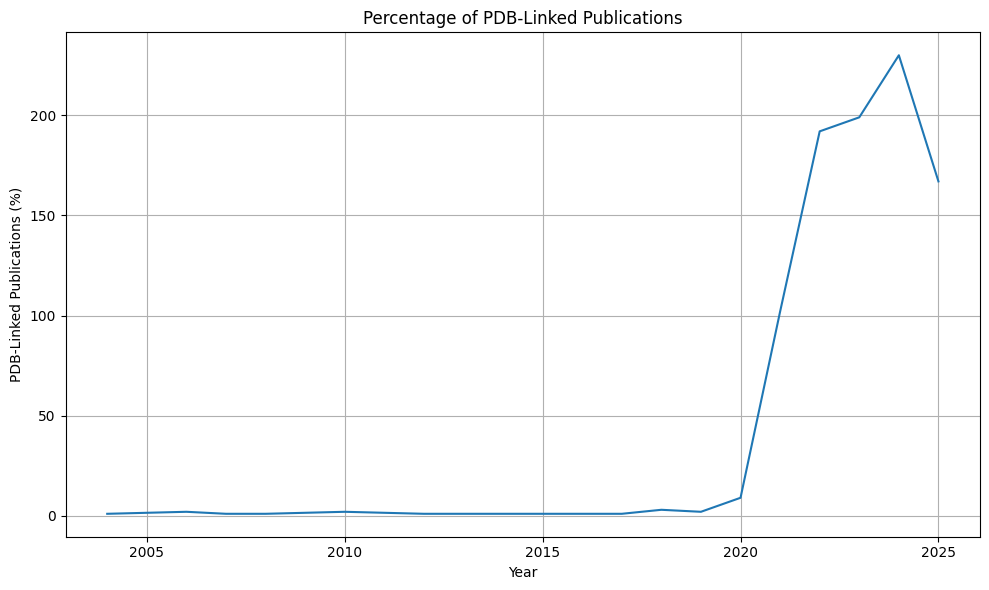

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(grouped['year'], grouped['pdb_linked_count'])
plt.title('Percentage of PDB-Linked Publications')
plt.xlabel('Year')
plt.ylabel('PDB-Linked Publications (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# Commentary about the data
# Between 2006 and 2019, the number of publications with PDBe links remained extremely low—just one per year in 2006, 2014, and 2019—indicating limited structural data integration during that time.

# A significant upward shift began in 2020, with 9 publications, followed by a dramatic spike in 2021, reaching 101 PDBe-linked articles. This trend continued into 2022 (191 publications) and 2023 (199 publications), showing consistent momentum and growing emphasis on structure-informed research.

# In 2024, the count peaked at 227, reinforcing a new norm of high PDBe representation in scientific literature.

# For 2025, the count currently stands at 151 PDBe-linked publications. If trends continue, the final number for 2025 is likely to align with or exceed that of previous years.

# Interpretation:
# The rise in PDBe-linked publications after 2020 reflects a broader shift toward structure-based biology, possibly influenced by improvements in structural tools, data sharing, and public interest in molecular mechanisms post-COVID.

# While 2025 currently shows a dip, it is premature to interpret it as a decline—the publication year is ongoing and the current figure is likely to rise in the second half.
